In [55]:
from qiskit import * ### Importing the library to our notebook
from qiskit_aer import AerSimulator
from qiskit_aer import AerProvider
from qiskit.visualization import plot_histogram
%matplotlib inline

In [56]:
qc = QuantumCircuit(3)
qc.draw()

q_0: 
     
q_1: 
     
q_2:

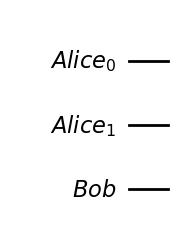

In [57]:
from qiskit import QuantumRegister

alice_qubit = QuantumRegister(2, "Alice") #alice as the bell state qubit, and the qubit she wants to import
bob_qubit = QuantumRegister(1, "Bob") # bob only has the bell state qubit
qc = QuantumCircuit(alice_qubit, bob_qubit)
qc.draw('mpl')

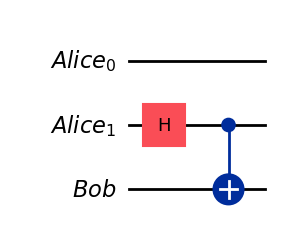

In [58]:
#create entagled bell state between bob and alice 

qc.h(alice_qubit[1]) 
qc.cx(alice_qubit[1], bob_qubit[0])
qc.draw('mpl')

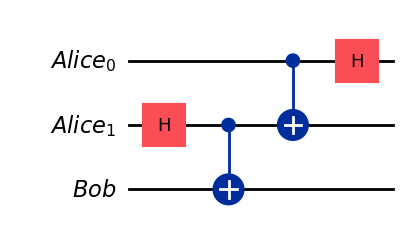

In [59]:
#apply cnot and H gate to alice's qubits 

qc.cx(alice_qubit[0], alice_qubit[1])
qc.h(alice_qubit[0]) #apply H to alice's first qubit 
qc.draw('mpl')

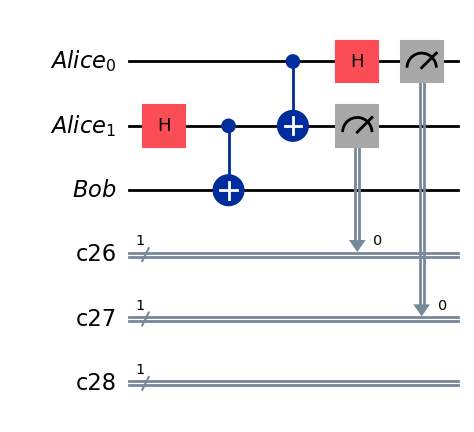

In [60]:
#measure alices qubits 

from qiskit import ClassicalRegister

alice_bell = ClassicalRegister(1)
qc.add_register(alice_bell)
alice_qubit2 = ClassicalRegister(1)
qc.add_register(alice_qubit2)
bob_final = ClassicalRegister(1)
qc.add_register(bob_final)

qc.measure(alice_qubit[1],alice_bell)
qc.measure(alice_qubit[0],alice_qubit2)

qc.draw(output='mpl')



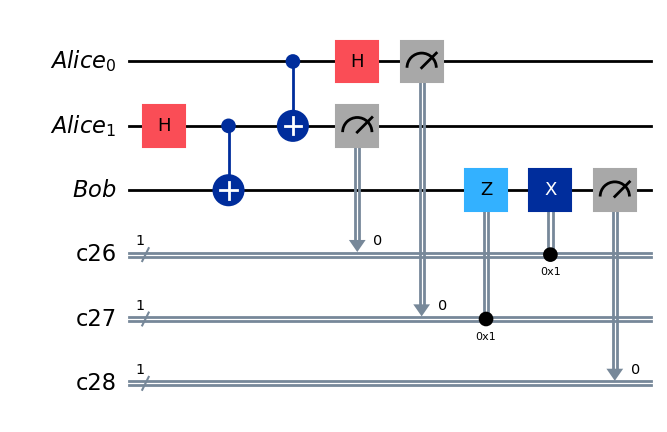

In [61]:
# Now that Alice has measured the two qubits their states have been found to 0 and 1 
# Bob can do operations conditioned on these qubits to his half of the Bell pair
qc.z(bob_qubit).c_if(alice_qubit2, 1)  # Apply Z gate if Alice's qubit was |1>
qc.x(bob_qubit).c_if(alice_bell, 1)  # Apply X gate if Alice's Bell measurement was |1>

qc.measure(bob_qubit, bob_final)

qc.draw(output='mpl')



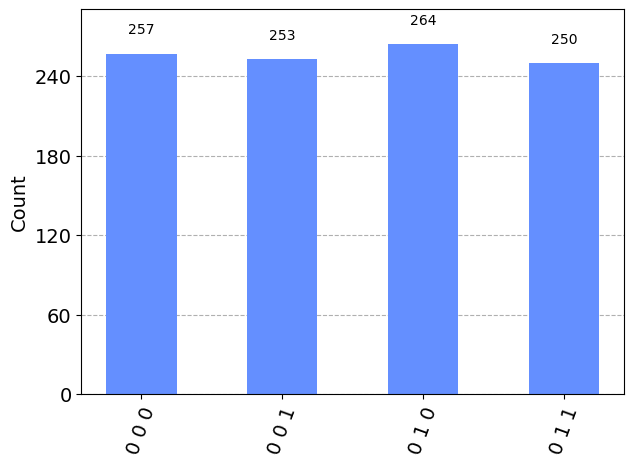

In [68]:
prov = AerProvider()
simulator = prov.get_backend('qasm_simulator')
result = simulator.run(qc).result()
plot_histogram(result.get_counts(qc))